# Packages

In [2]:
import os
import anndata
import logging
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import leidenalg
import csv
from pandas import Timestamp
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import rankdata 
import scipy

In [3]:
sc.settings.verbosity =3
sc.logging.print_version_and_date()
sc.settings.set_figure_params(dpi=140, color_map='RdBu_r')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

Running Scanpy 1.5.1, on 2023-07-31 10:14.


In [4]:
random_state=10

In [5]:
path_to_fast="/fast/AG_Huebner/"

In [6]:
now = datetime.now()
today=now.strftime("%Y%m%d")
print("Today is", today)

Today is 20230731


# Load global object

In [7]:
all_samples_fromglobal=pd.read_csv("GLOBAL_META.csv")

/fast/AG_Huebner/GUIX_PROFILES/conda_envs/scanpy_151/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
all_samples_fromglobal.Region.value_counts()

LV    159477
AP     46119
Name: Region, dtype: int64

In [9]:
all_samples_fromglobal=all_samples_fromglobal.Sample.unique()

In [10]:
all_samples_fromglobal=all_samples_fromglobal.tolist()

The background for Boston, BO and HCA samples were already aligned. Only proceed with CVK samples

In [ ]:
all_samples_fromglobal_array=np.array(all_samples_fromglobal)
all_samples_fromglobal_array=all_samples_fromglobal_array[np.where(["CVK" in i for i in all_samples_fromglobal])[0]]
all_samples_fromglobal_array

# Explant

# Biopsy

In [15]:
# This line is only important when individual files are in separate folders
folder1=['']
folder2=
folder3=

In [19]:
def load_10x_h5_sampleid(path_to_fast, sample_name):
    # Load objects
    
    x=sc.read_10x_h5(path_to_fast + 'huebner3/ANALYSES/20200706_gp_COVID_Biopsy/' + sample_name + '_SC3Pv3/outs/raw_feature_bc_matrix.h5')
    y=pd.read_csv(path_to_fast + 'huebner3/ANALYSES/20200706_gp_COVID_Biopsy/' + sample_name + '_SC3Pv3/outs/filtered_feature_bc_matrix/barcodes.tsv.gz', header=None)
    x.obs['Sample']=sample_name
    x.var_names_make_unique()
    
    # Remove cell barcodes
    x.obs['n_counts']=np.asarray(np.sum((x.X).transpose(), axis=0))[0]
    x.obs['count_rank']=(-x.obs.n_counts).rank(method="first")
    x=x[np.where(x.obs['count_rank']<=1.3e5)].copy()
    x.obs['true_cell']=(x.obs.index).isin(y[0])
    
    # Calculate top background genes
    x_bg=x[x.obs['n_counts']>=20]
    x_bg=x_bg[~x_bg.obs['true_cell']].copy()
    x_bg.var['background_UMI']=np.asarray(x_bg.X.mean(axis=0))[0]
    x_bg.var['background_UMI_rank']=x_bg.var['background_UMI'].rank(method="first")
    x_bg=x_bg.var.loc[:,['background_UMI', 'background_UMI_rank']]
    x_bg.background_UMI_rank=(x_bg.shape[0]+1)-x_bg.background_UMI_rank

    x_bg['Sample']=sample_name
    
    # 
    x=x.obs
    
    return x, x_bg

In [17]:
def load_10x_h5_sampleid_folder2(path_to_fast, sample_name):
    # Load objects
    
    x=sc.read_10x_h5(path_to_fast + 'huebner3/ANALYSES/20200706_gp_COVID_Biopsy/' + sample_name + '/outs/raw_feature_bc_matrix.h5')
    y=pd.read_csv(path_to_fast + 'huebner3/ANALYSES/20200706_gp_COVID_Biopsy/' + sample_name + '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz', header=None)
    x.obs['Sample']=sample_name
    x.var_names_make_unique()
    
    # Remove cell barcodes
    x.obs['n_counts']=np.asarray(np.sum((x.X).transpose(), axis=0))[0]
    x.obs['count_rank']=(-x.obs.n_counts).rank(method="first")
    x=x[np.where(x.obs['count_rank']<=1.3e5)].copy()
    x.obs['true_cell']=(x.obs.index).isin(y[0])
    
    # Calculate top background genes
    x_bg=x[x.obs['n_counts']>=20]
    x_bg=x_bg[~x_bg.obs['true_cell']].copy()
    x_bg.var['background_UMI']=np.asarray(x_bg.X.mean(axis=0))[0]
    x_bg.var['background_UMI_rank']=x_bg.var['background_UMI'].rank(method="first")
    x_bg=x_bg.var.loc[:,['background_UMI', 'background_UMI_rank']]
    x_bg.background_UMI_rank=(x_bg.shape[0]+1)-x_bg.background_UMI_rank

    x_bg['Sample']=sample_name
    
    # 
    x=x.obs
    
    return x, x_bg

In [18]:
def load_10x_h5_sampleid_folder3(path_to_fast, sample_name):
    # Load objects
    
    x=sc.read_10x_h5(path_to_fast + 'huebner3/ANALYSES/20210706_gp_HIGH-CaPACITY/Cellranger_302/' + sample_name + '_SC3Pv3/outs/raw_feature_bc_matrix.h5')
    y=pd.read_csv(path_to_fast + 'huebner3/ANALYSES/20210706_gp_HIGH-CaPACITY/Cellranger_302/' + sample_name + '_SC3Pv3/outs/filtered_feature_bc_matrix/barcodes.tsv.gz', header=None)
    x.obs['Sample']=sample_name
    x.var_names_make_unique()
    
    # Remove cell barcodes
    x.obs['n_counts']=np.asarray(np.sum((x.X).transpose(), axis=0))[0]
    x.obs['count_rank']=(-x.obs.n_counts).rank(method="first")
    x=x[np.where(x.obs['count_rank']<=1.3e5)].copy()
    x.obs['true_cell']=(x.obs.index).isin(y[0])
    
    # Calculate top background genes
    x_bg=x[x.obs['n_counts']>=20]
    x_bg=x_bg[~x_bg.obs['true_cell']].copy()
    x_bg.var['background_UMI']=np.asarray(x_bg.X.mean(axis=0))[0]
    x_bg.var['background_UMI_rank']=x_bg.var['background_UMI'].rank(method="first")
    x_bg=x_bg.var.loc[:,['background_UMI', 'background_UMI_rank']]
    x_bg.background_UMI_rank=(x_bg.shape[0]+1)-x_bg.background_UMI_rank

    x_bg['Sample']=sample_name
    
    # 
    x=x.obs
    
    return x, x_bg

In [ ]:
bg_folder1 = [load_10x_h5_sampleid(path_to_fast, sample_name) for sample_name in folder1]
bg_folder2 = [load_10x_h5_sampleid_folder2(path_to_fast, sample_name) for sample_name in folder2]
bg_folder3 = [load_10x_h5_sampleid_folder3(path_to_fast, sample_name) for sample_name in folder3]

In [27]:
bg_folder1_1=[i[0] for i in bg_folder1]
bg_folder2_1=[i[0] for i in bg_folder2]
bg_folder3_1=[i[0] for i in bg_folder3]

In [29]:
bg_folder_all=bg_folder1_1[0].append(bg_folder1_1[1:], bg_folder2_1, bg_folder3_1)

In [48]:
bg_folder_all['Gene']="Biopsy"

In [33]:
BC_curve= pd.read_csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/results/BC_UMI_Curve/BOBSICCB_BCUMI_curve.tsv", sep="\t")

In [35]:
BC_curve=BC_curve[BC_curve.Gene=="control"]

,Unnamed: 0,Sample,n_counts,count_rank,true_cell,Patient,Gene,Region,Clinical.dominant.mutation
0,0,BS_H26_S00_premrna,1.0,119545.0,False,BS_H26,control,S,control
1,1,BS_H26_S00_premrna,1.0,119546.0,False,BS_H26,control,S,control
2,2,BS_H26_S00_premrna,1.0,119547.0,False,BS_H26,control,S,control
3,3,BS_H26_S00_premrna,36.0,62723.0,False,BS_H26,control,S,control
4,4,BS_H26_S00_premrna,54.0,16203.0,False,BS_H26,control,S,control
...,...,...,...,...,...,...,...,...,...
25089995,25089995,HCAHeart7888924_premrna,25.0,50304.0,False,D7,control,S,control
25089996,25089996,HCAHeart7888924_premrna,21.0,69989.0,False,D7,control,S,control
25089997,25089997,HCAHeart7888924_premrna,15.0,90726.0,False,D7,control,S,control
25089998,25089998,HCAHeart7888924_premrna,7.0,104570.0,False,D7,control,S,control


In [45]:
BC_curve=BC_curve[BC_curve.Region.isin(['FW', 'AP'])]

In [51]:
bg_all=bg_folder_all.append(BC_curve[['Sample', 'n_counts', 'count_rank', 'true_cell', 'Gene']])

In [53]:
bg_all.to_csv("/fast/AG_Huebner/huebner3/ANALYSES/20200706_el_COVID_Biopsy/data_publication/BC_rank_table.csv", sep="\t")

# General QC

In [55]:
all_samples_fromglobal_h5ad=sc.read_h5ad("GLOBAL.h5ad")

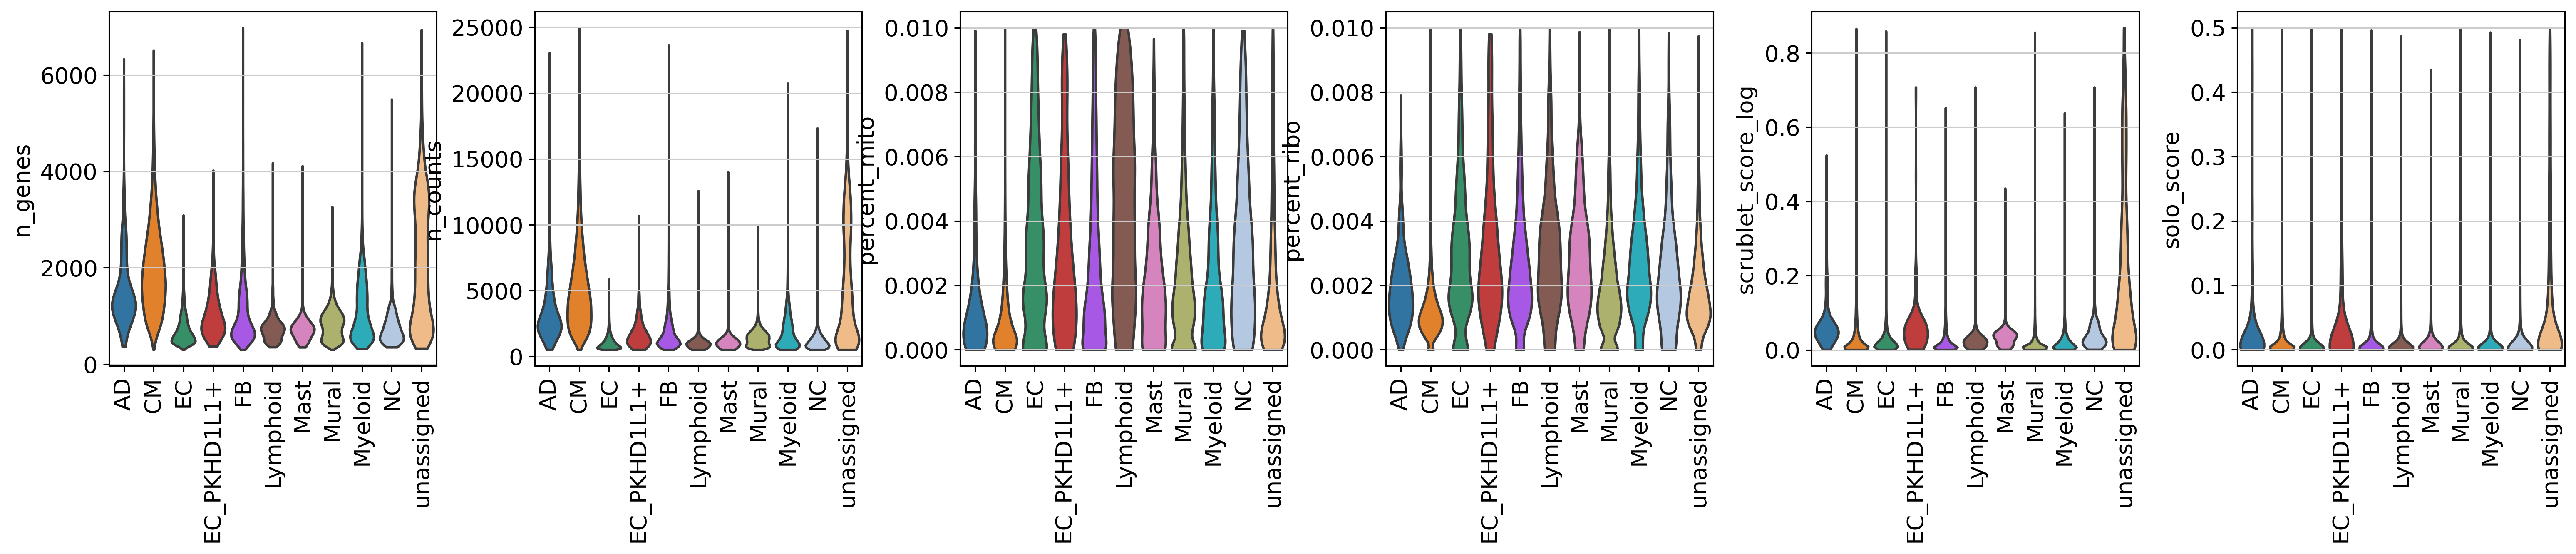

In [76]:
sc.pl.violin(all_samples_fromglobal_h5ad[all_samples_fromglobal_h5ad.obs['Condition']=="Control"], 
              keys=['n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_log', 'solo_score'],
              groupby="celltype_classified", rotation=90, save="QC_allcelltypes_explant.pdf", jitter=False, stripplot=False)

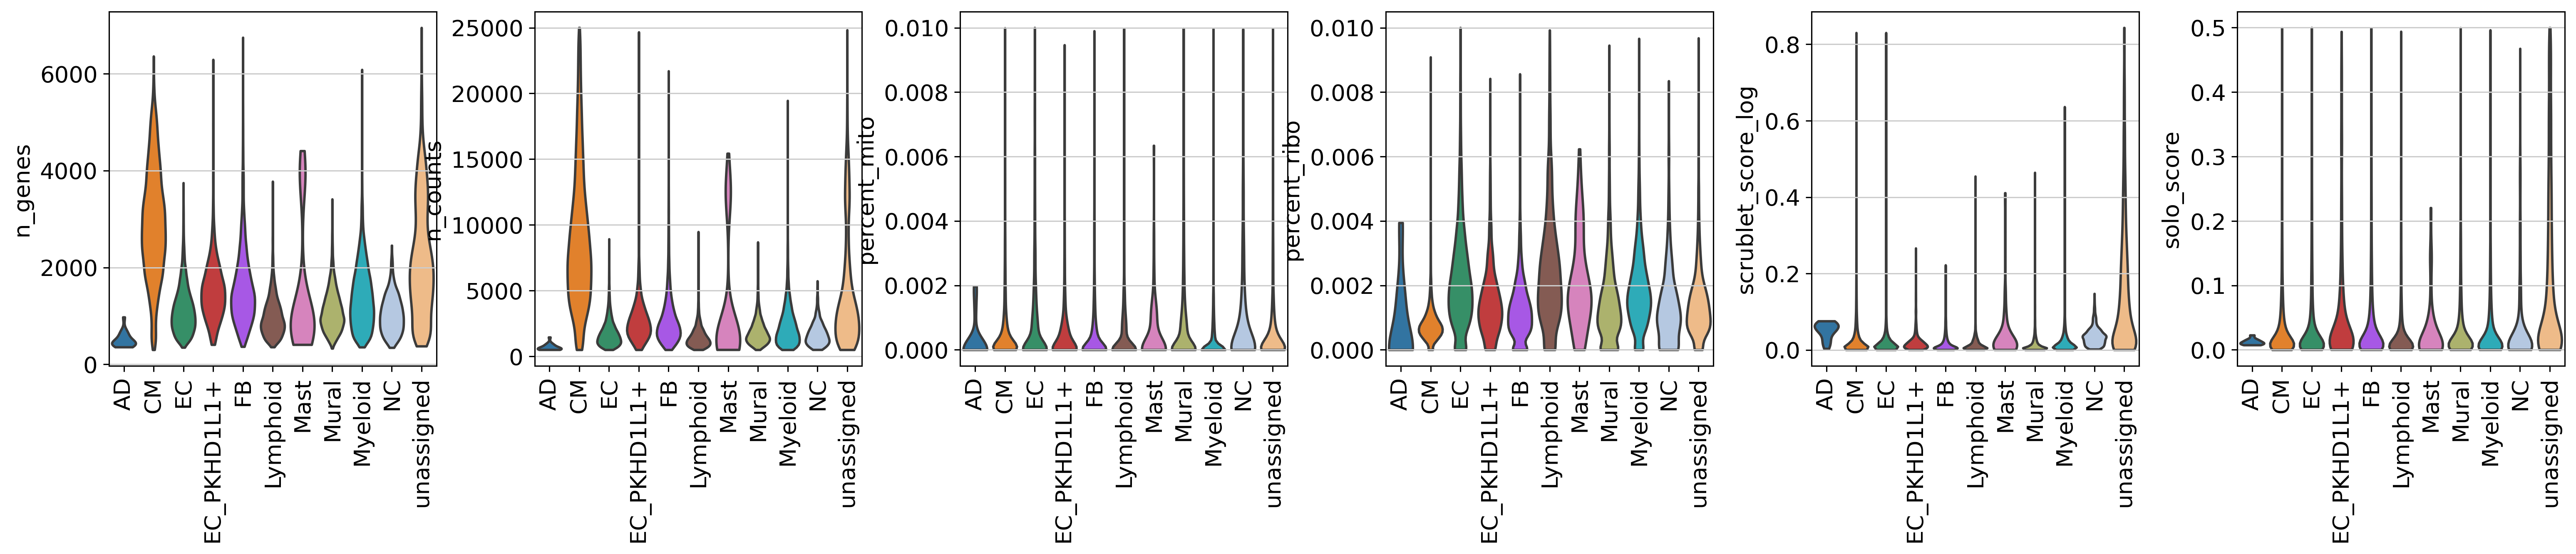

In [77]:
sc.pl.violin(all_samples_fromglobal_h5ad[all_samples_fromglobal_h5ad.obs['Condition']!="Control"], 
              keys=['n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_log', 'solo_score'],
              groupby="celltype_classified", rotation=90, save="QC_allcelltypes_biopsy.pdf", jitter=False, stripplot=False)

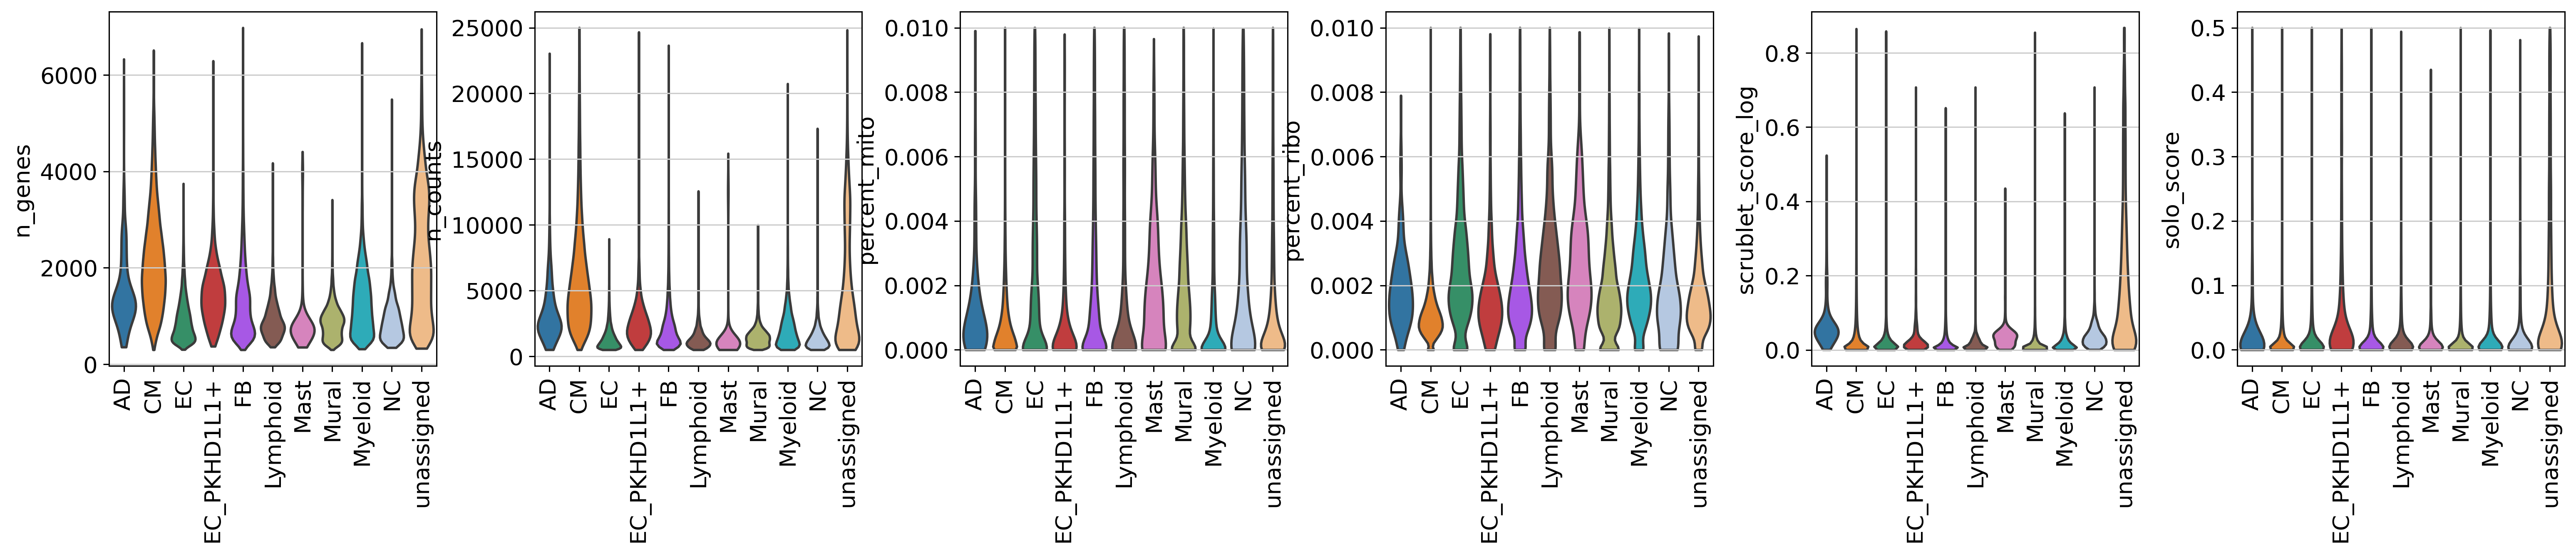

In [78]:
sc.pl.violin(all_samples_fromglobal_h5ad, 
              keys=['n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_log', 'solo_score'],
              groupby="celltype_classified", rotation=90, save="QC_allcelltypes_all.pdf", jitter=False, stripplot=False)